In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from keras.wrappers.scikit_learn import KerasClassifier
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

In [3]:
data = pd.read_csv('outlier_remove.csv')

In [4]:
df = data[data['popularity_dummy']==1]

In [5]:
df.reset_index(drop= True,inplace=True)

In [6]:
df.shape

(27406, 59)

In [7]:
df.head()

,id,song,album,artist,acousticness_x,danceability_x,duration_ms_x,energy_x,instrumentalness_x,key_x,liveness_x,loudness_x,mode_x,speechiness_x,tempo_x,time_signature,valence_x,album_id,date,date_year,duration_ms_d,com_f_x,acousticness_y,artists,danceability_y,duration_ms_y,energy_y,explicit,instrumentalness_y,key_y,liveness_y,loudness_y,mode_y,name,popularity,release_date,speechiness_y,tempo_y,valence_y,year,release_date_year,artists_d,com_f_y,popularity_dummy,lyrics,stats_dict_tuple,num_sentences,num_words,num_syllables,readability,grade,richness,Language,neg,neu,pos,compound,compound_vader_polarity,artist_popularity
0,6hAd8xvI3od0RlRpP3n4Kc,Grease Paint And Monkey Brains,"Astro Creep: 2000 Songs Of Love, Destruction",White Zombie,0.000010,0.487,229187.0,0.900,0.841000,6.0,0.1610,-7.987,1.0,0.0824,146.729,4.0,0.5700,3HugnfabsMODIbxzwxS5xC,1995,1995.0,229187.0,White Zombie229187Grease Paint And Monkey Brai...,0.000007,['White Zombie'],0.475,229187,0.910,0,0.814000,6,0.1600,-8.047,1,Grease Paint And Monkey Brains,31,1995,0.0686,146.744,0.5830,1995,1995-01-01,White Zombie,White Zombie229187Grease Paint And Monkey Brai...,1,death is on the midway gambling with souls rou...,"({'num_sentences': 4, 'num_words': 99, 'num_sy...",4.0,99.0,109.0,88.568,6th Grade,0.587629,en,0.135,0.711,0.154,-0.5022,-1.0,60.0
1,6hCZTtQ84zVg3gGXQaIGZv,With A Gun,Pretzel Logic,Steely Dan,0.044600,0.715,138787.0,0.579,0.000000,2.0,0.0951,-11.147,0.0,0.0313,108.888,4.0,0.9340,2OUYJtDV6EmLkVyoHSuGIp,1974-01-01,1974.0,138787.0,Steely Dan138787With A Gun0.04460.7150.5790.02...,0.045600,['Steely Dan'],0.714,136933,0.560,0,0.000000,2,0.0613,-11.684,0,With A Gun,37,1974-01-01,0.0326,109.071,0.9550,1974,1974-01-01,Steely Dan,Steely Dan136933With A Gun0.04560.714000000000...,1,i could be wrong but i have seen your face bef...,"({'num_sentences': 3, 'num_words': 240, 'num_s...",3.0,240.0,258.0,34.690,College Level,0.264706,en,0.235,0.671,0.093,-0.9898,-1.0,71.0
2,6hHUiDe461VUoTHnsplRYs,What I Am,Shooting Rubberbands At The Stars,Edie Brickell & New Bohemians,0.656000,0.630,297867.0,0.674,0.000049,2.0,0.0577,-11.697,1.0,0.0834,177.841,4.0,0.5560,2oZzKVi2mqkQnZOad6DXMw,1988-01-01,1988.0,297867.0,Edie Brickell & New Bohemians297867What I Am0....,0.624000,['Edie Brickell & New Bohemians'],0.619,296360,0.677,0,0.000065,11,0.0589,-11.728,0,What I Am,56,1988-01-01,0.0746,177.873,0.5710,1988,1988-01-01,Edie Brickell & New Bohemians,Edie Brickell & New Bohemians296360What I Am0....,1,i ' not aware of too many things i know what i...,"({'num_sentences': 3, 'num_words': 210, 'num_s...",3.0,210.0,227.0,44.336,College Level,0.057692,en,0.076,0.911,0.013,-0.9192,-1.0,48.0
3,6hHpXo2XMMKR5lIfa19aLM,Get Out Alive,One - X,Three Days Grace,0.000319,0.493,262493.0,0.896,0.000000,7.0,0.0869,-4.569,0.0,0.0365,117.964,4.0,0.0791,4ZDwEvXIKxWdwhAQK8ndBU,2006-06-25,2006.0,262493.0,Three Days Grace262493Get Out Alive0.0003190.4...,0.000319,['Three Days Grace'],0.493,262493,0.896,0,0.000000,7,0.0869,-4.569,0,Get Out Alive,57,2006-06-25,0.0365,117.964,0.0791,2006,2006-01-01,Three Days Grace,Three Days Grace262493Get Out Alive0.0003190.4...,1,""" no time for goodbye "", he said as he faded a...","({'num_sentences': 1, 'num_words': 305, 'num_s...",1.0,305.0,306.0,-187.617,College Graduate,0.091483,en,0.022,0.856,0.122,0.9801,1.0,78.0
4,6hKnIY2Ssrmqw2TYXW0K5e,This Could Be Anywhere In The World,Crisis,AlexisOnFire,0.000047,0.192,243467.0,0.757,0.001330,9.0,0.1230,-5.253,1.0,0.0844,83.105,5.0,0.2940,1eAMmJv65w0W2w50HDmTEw,2006-01-22,2006.0,243467.0,AlexisOnFire243467This Could Be Anywhere In Th...,0.000047,['Alexisonfire'],0.192,243467,0.757,0,0.001330,9,0.1230,-5.253,1,This Could Be Anywhere In The World,53,2006-01-22,0.0844,83.105,0.2940,2006,2006-01-01,Alexisonfire,Alexisonfire243467This Could Be Anywhere In Th...,1,this town has its claws buried in my neck this...,"({'num_sentences': 5, 'num_words': 269, 'num_s...",5.0,269.0,290.0,61.024,9th Grade,0.249057,en,0.154,0.784,0.063,-0.9851,-1.0,57.0

In [8]:
df['year_count']= pd.to_datetime(df.year, format='%Y')

In [9]:
a = df[(df['year']>1963) & (df['year']< 2019)]

In [10]:
a['year_count']= pd.to_datetime(a.year, format='%Y')

In [12]:
pd.DataFrame(a.year_count.value_counts())

,year_count
1996-01-01,636
2002-01-01,627
1975-01-01,617
1989-01-01,615
1988-01-01,608
1993-01-01,606
1999-01-01,598
1971-01-01,598
1974-01-01,585
1991-01-01,582


<AxesSubplot:>

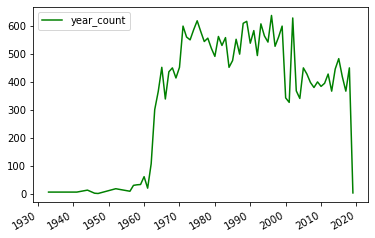

In [216]:
# What is the year where most of the releases happens?
pd.DataFrame(df.year_count.value_counts()).plot(color = 'g')

<AxesSubplot:>

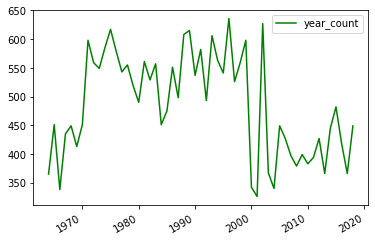

In [217]:
# What is the year where most of the releases happens?
pd.DataFrame(a.year_count.value_counts()).plot(color = 'g')

<AxesSubplot:xlabel='year'>

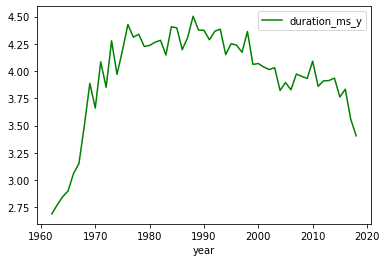

In [208]:
#Is songs getting shorter or longer?
(a.groupby('year').mean()[['duration_ms_y']]/60000).plot(color = 'g')

In [218]:
a['duration_min'] = a['duration_ms_y'] / 60000

<AxesSubplot:xlabel='year', ylabel='duration_min'>

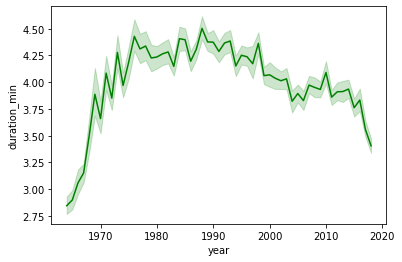

In [219]:
sns.lineplot(y = 'duration_min', x = 'year', data = a, color = 'g')

<AxesSubplot:title={'center':'duration_min'}, xlabel='year'>

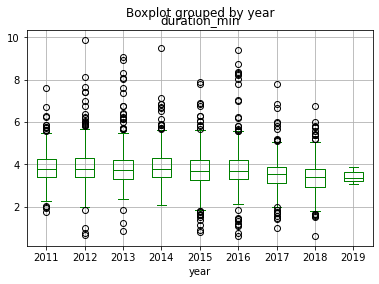

In [221]:
#last ten years
fil = df['year'] > 2010
df_last = df[fil]
df_last['duration_min'] = df_last['duration_ms_y'] / 60000
df_last[['year','duration_min']].boxplot(column = 'duration_min',by = 'year',color = 'g')

<AxesSubplot:xlabel='year', ylabel='duration_min'>

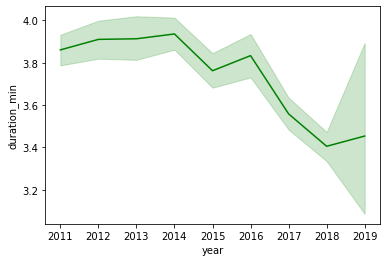

In [222]:
sns.lineplot(y = 'duration_min', x = 'year', data = df_last, color = 'g')

In [13]:
acoustic_col= ['acousticness_y','danceability_y','duration_ms_y','energy_y','instrumentalness_y','key_y',
       'liveness_y','loudness_y','speechiness_y','tempo_y','valence_y']
lyrics_col = ['num_words','num_syllables','readability','richness','compound','artist_popularity']

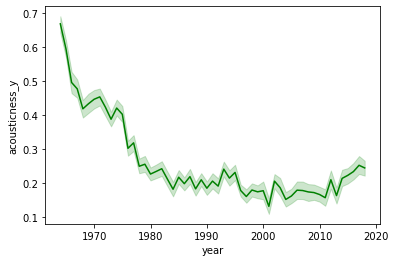

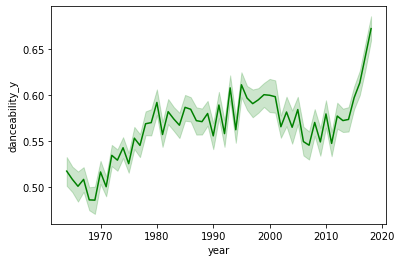

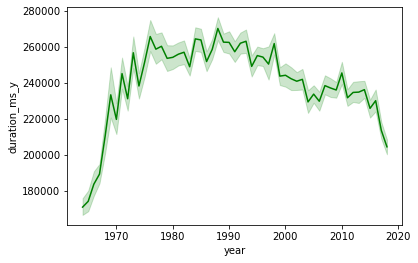

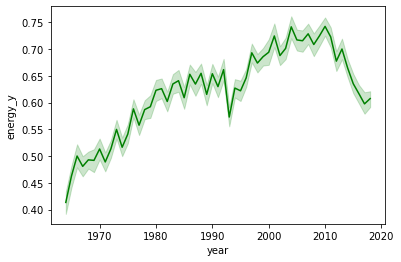

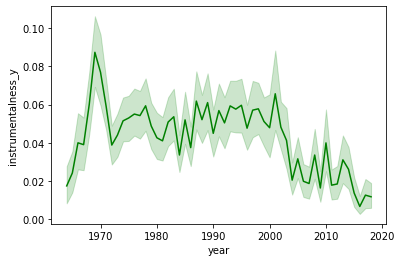

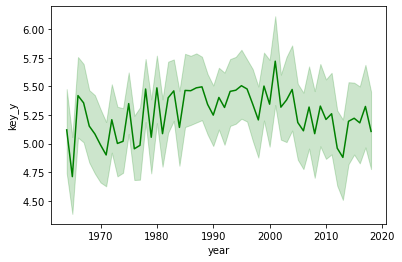

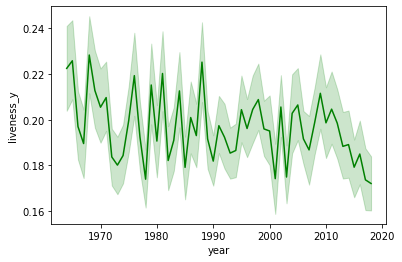

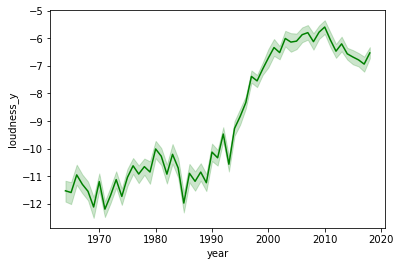

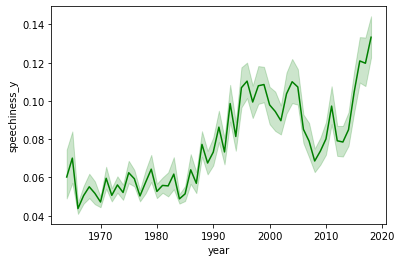

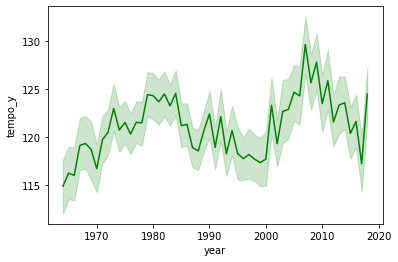

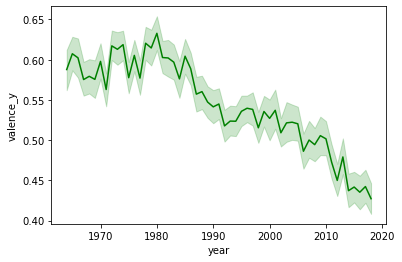

In [223]:
for i in acoustic_col:
    sns.lineplot(y = i, x = 'year', data = a, color = 'g')
    plt.show()

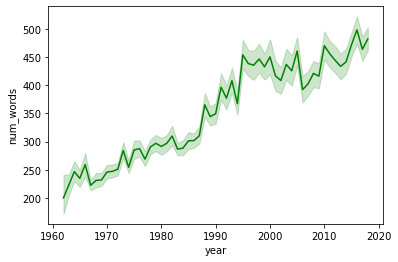

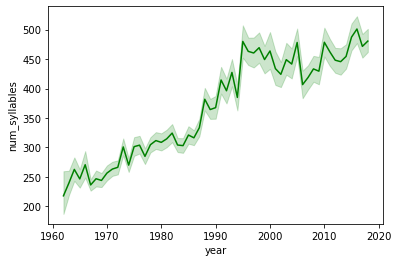

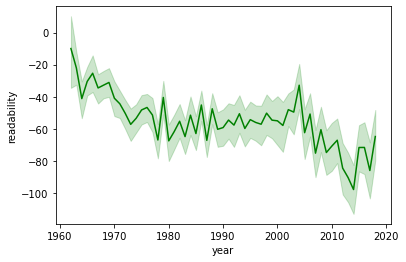

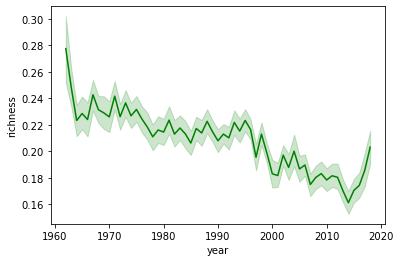

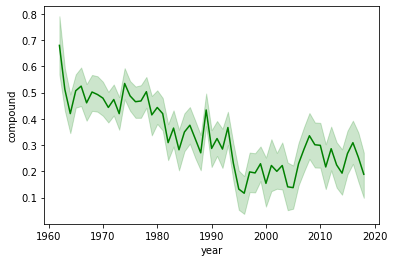

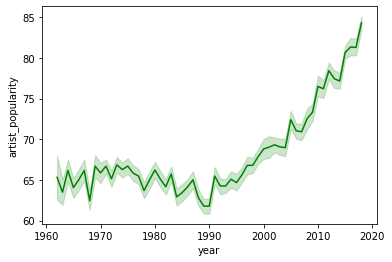

In [211]:
for i in lyrics_col:
    sns.lineplot(y = i, x = 'year', data = a, color = 'g')
    plt.show()

In [46]:
mood1 = pd.read_csv("lyrics_pred_class_lda.csv",index_col=0)

In [47]:
com = pd.concat([data,mood1],axis=1)
com.head()

,id,song,album,artist,acousticness_x,danceability_x,duration_ms_x,energy_x,instrumentalness_x,key_x,liveness_x,loudness_x,mode_x,speechiness_x,tempo_x,time_signature,valence_x,album_id,date,date_year,duration_ms_d,com_f_x,acousticness_y,artists,danceability_y,duration_ms_y,energy_y,explicit,instrumentalness_y,key_y,liveness_y,loudness_y,mode_y,name,popularity,release_date,speechiness_y,tempo_y,valence_y,year,release_date_year,artists_d,com_f_y,popularity_dummy,lyrics,stats_dict_tuple,num_sentences,num_words,num_syllables,readability,grade,richness,Language,neg,neu,pos,compound,compound_vader_polarity,artist_popularity,classes
0,1mTxphc9naXMLE9qfMkEVh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0309,['The Cotton Candy Blues Band'],0.593,187286,0.450,0,0.00187,2,0.334,-10.679,1,Early in the morning,0,1940,0.0307,112.054,0.454,1940,1940-01-01,The Cotton Candy Blues Band,The Cotton Candy Blues Band187286Early in the ...,0,"money on the table , i ain ' tryna play with y...","({'num_sentences': 6, 'num_words': 783, 'num_s...",6.0,783.0,735.0,-5.036,College Graduate,0.177977,en,0.102,0.846,0.052,-0.9857,-1.0,0.000000,3
1,2Tp1yCGNjjZ39HTEnKaqhx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9760,['The Keynotes'],0.369,103333,0.228,0,0.00000,1,0.150,-9.628,1,I Don't Know,0,1945,0.0300,82.394,0.572,1945,1945-01-01,The Keynotes,The Keynotes103333I Don't Know0.9760.3690.2280...,0,"i don ' know why i love you like i do oh , my ...","({'num_sentences': 4, 'num_words': 186, 'num_s...",4.0,186.0,152.0,90.502,5th Grade,0.076503,en,0.294,0.455,0.251,-0.8895,-1.0,5.000000,2
2,3plzStfrkTOq9lehqqI3bG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3660,['EOR'],0.631,324882,0.682,0,0.00000,9,0.338,-10.486,0,Till,0,1946,0.0417,150.061,0.386,1946,1946-01-01,EOR,EOR324882Till0.3660.6310.68200.090.338-10.4860...,0,"hook : i ' just tryna be my own man , my own m...","({'num_sentences': 6, 'num_words': 495, 'num_s...",6.0,495.0,527.0,33.028,College Level,0.254582,en,0.064,0.800,0.136,0.9856,1.0,46.000000,2
3,2MGhUOnAifh3znlInWnywc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9260,['Lowell Fulson'],0.670,170333,0.351,0,0.00531,0,0.168,-5.714,1,Fulson Blues,0,1945,0.0693,140.253,0.580,1945,1945-01-01,Lowell Fulson,Lowell Fulson170333Fulson Blues0.9260.670.3510...,0,i ain ' heard your voice in such as long time ...,"({'num_sentences': 1, 'num_words': 183, 'num_s...",1.0,183.0,179.0,-61.661,College Graduate,0.191257,en,0.109,0.817,0.074,-0.5831,-1.0,38.000000,1
4,1vDRvO1X021HlJY2NnqUU2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9620,['Sonny Boy Williamson I'],0.572,186227,0.164,0,0.00346,0,0.247,-15.842,1,Down South,0,1945,0.0471,78.439,0.661,1945,1945-01-01,Sonny Boy Williamson I,Sonny Boy Williamson I186227Down South0.9620.5...,0,hobo blues 3 : 22 trk yank rachel - vocal & gu...,"({'num_sentences': 8, 'num_words': 486, 'num_s...",8.0,486.0,434.0,69.626,9th Grade,0.200000,en,0.034,0.913,0.053,0.6788,1.0,60.848402,1


In [48]:
com = com[com["popularity_dummy"]==1]

In [49]:
emotion_dict = {0:'neutral', 1:'happy', 2:'sad',3:'hate',4:'anger'}

In [50]:
com['classes']= com['classes'].map (emotion_dict)

<AxesSubplot:>

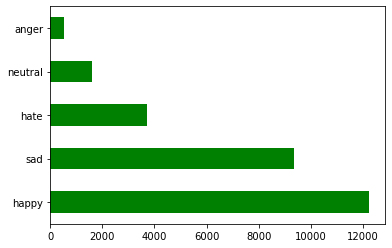

In [33]:
com.classes.value_counts().plot(kind='barh',color = 'g')

In [70]:
b = com[(com['year']>2010) & (com['year']<2019)]
c = com[(com['year']>2000) & (com['year']<2010)]
d = com[(com['year']>1990) & (com['year']<2000)]
e = com[(com['year']>1980) & (com['year']<1990)]
f = com[(com['year']>1970) & (com['year']<1980)]
g = com[(com['year']>1960) & (com['year']<1970)]

In [82]:
emo = pd.DataFrame({"1960-1970": g.classes.value_counts(),
             "1970-1980": f.classes.value_counts(),
             "1980-1990": e.classes.value_counts(),
             "1990-2000": d.classes.value_counts(),
             "2000-2010": c.classes.value_counts(),
             "2010-2020":b.classes.value_counts()})

In [87]:
emo

,1960-1970,1970-1980,1980-1990,1990-2000,2000-2010,2010-2020
anger,30,93,127,103,66,59
happy,1582,2518,2272,2015,1313,1355
hate,210,496,563,967,608,575
neutral,144,304,245,337,228,216
sad,912,1693,1638,1682,1496,1142


In [93]:
emo.columns

Index(['1960-1970', '1970-1980', '1980-1990', '1990-2000', '2000-2010',
       '2010-2020'],
      dtype='object')

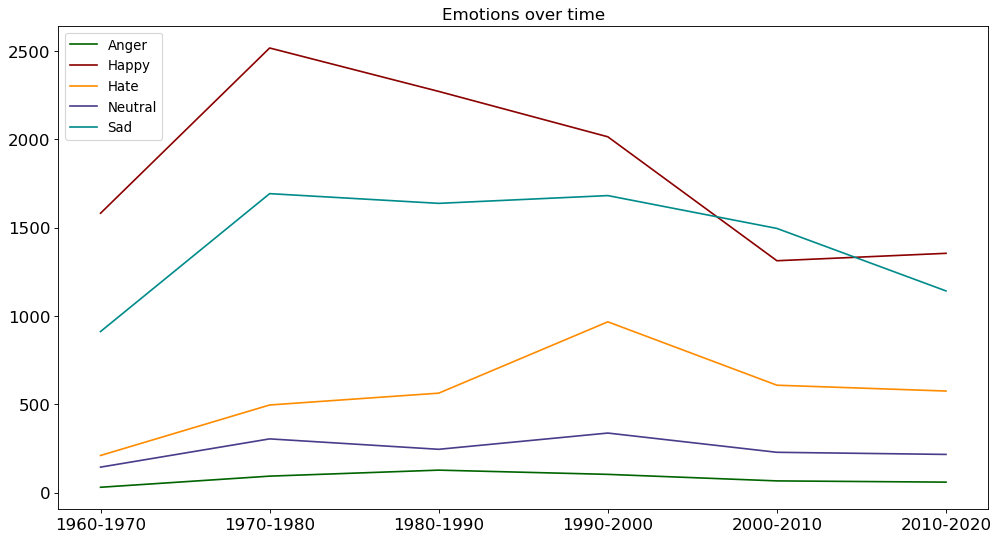

In [113]:
#取相关的行

num1=emo.loc['anger',:]
num2=emo.loc['happy',:]
num3=emo.loc['hate',:]
num4=emo.loc['neutral',:]
num5=emo.loc['sad',:]

#设置图片大小
plt.figure(figsize=(15, 8), dpi=80)


#画图——折线图
plt.plot(emo.columns, num1, label='Anger',color="darkgreen")
plt.plot(emo.columns, num2, label='Happy',color="darkred")
plt.plot(emo.columns, num3, label='Hate',color="darkorange")
plt.plot(emo.columns, num4, label='Neutral',color="darkslateblue")
plt.plot(emo.columns, num5, label='Sad',color="darkcyan")

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(loc="upper left", fontsize=12)
plt.title('Emotions over time',fontsize=15)
plt.show()

<AxesSubplot:title={'center':'1970-1980'}, ylabel='classes'>

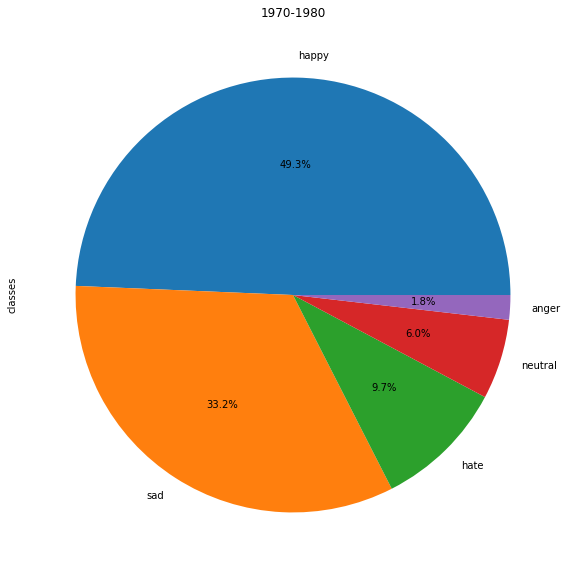

In [63]:
c = com[(com['year']>1970) & (com['year']<1980)]
plt.figure(figsize=(10,10))
plt.title ('1970-1980')
c.classes.value_counts().plot(kind='pie',autopct='%1.1f%%')

In [37]:
com = pd.concat([com, pd.get_dummies(com['classes'])], axis = 1)

In [38]:
com.drop(columns = ['classes'], inplace = True)
com.rename(columns={0:'neutral', 1:'happy', 2:'sad',3:'hate',4:'anger'}, inplace = True)

In [150]:
# import matplotlib.ticker as ticker
# data  = np.hstack((com.happy,com.year)).astype(int)
# plot_ = sns.countplot(data)
# plot_.xaxis.set_major_locator(ticker.LinearLocator(10))

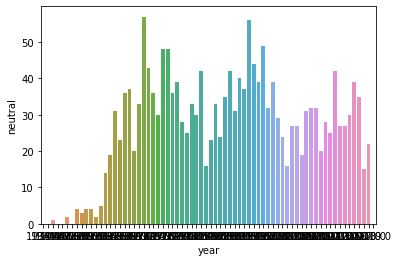

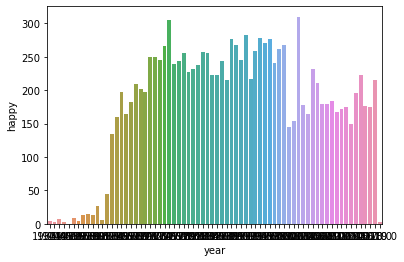

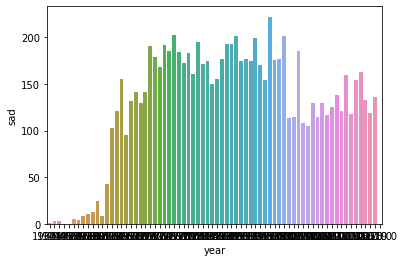

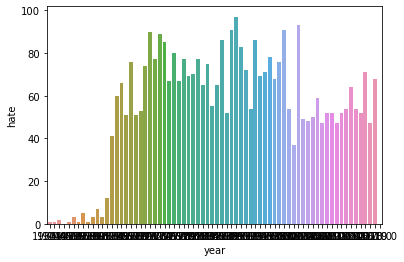

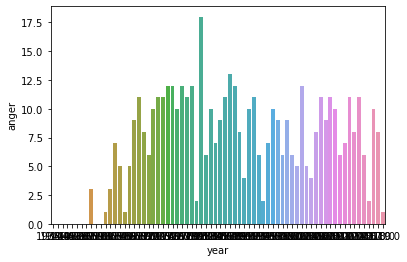

In [195]:
for i in ['neutral', 'happy', 'sad','hate','anger']:
    b = com[['year',i]].groupby('year').sum().reset_index()
    sns.barplot(x='year',y=i,data=b)
    plt.show()

In [198]:
# # # Setup a plot such that only the bottom spine is shown
# # def setup(ax):
# #     ax.spines['right'].set_color('none')
# #     ax.spines['left'].set_color('none')
# #     ax.yaxis.set_major_locator(ticker.NullLocator())
# #     ax.spines['top'].set_color('none')
# #     ax.xaxis.set_ticks_position('bottom')
# #     ax.tick_params(which='major', width=1.00)
# # #     ax.tick_params(which='major', length=5)
# # #     ax.tick_params(which='minor', width=0.75)
# # #     ax.tick_params(which='minor', length=2.5)
# #     ax.set_xlim(0, 5)
# #     ax.set_ylim(0, 1)
# #     ax.patch.set_alpha(0.0)


# # plt.figure(figsize=(8, 6))
# # n = 8 # Linear Locator
# # ax = plt.subplot(10, 10, 15)
# # setup(ax)
# # # ax.xaxis.set_major_locator(ticker.LinearLocator(10))
# # # ax.xaxis.set_minor_locator(ticker.LinearLocator(3))
# # # ax.text(0.0, 0.1, "LinearLocator(numticks=10)",
# # #         fontsize=14, transform=ax.transAxes)


# plt.title("A Title") #Add plot title
# # plot_plt.ylabel("Survived") # Adjust the label of the y-axis
# # plt.xlabel("Sex") #Adjust the label of the x-axis
# # plt.ylim(0,100) #Adjust the limits of the y-axis
# # plt.xlim(0,10) # Adjust the limits of the x-axis
# plt.setp(ax,yticks=[0,5]) #Adjust a plot property
# plt.tight_layout()
# g=sns.barplot(x='year',y='happy',data=a)
# g.set_xticklabels(rotation=45)

In [39]:
ex = com[(com['year']>1980) & (com['year']< 2019)]

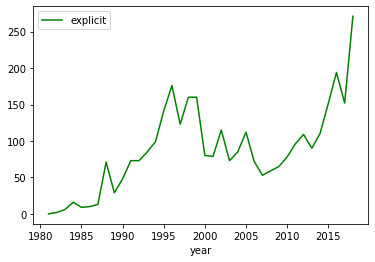

In [40]:
ex[['year','explicit']].groupby('year').sum().plot(color='g')
plt.savefig('ex')

<AxesSubplot:xlabel='year', ylabel='compound'>

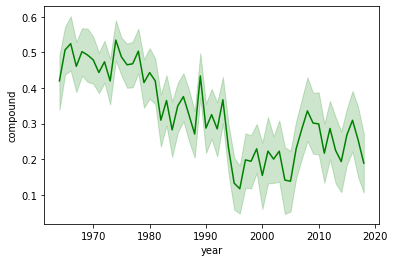

In [114]:
sns.lineplot(y = 'compound', x = 'year', data = a, color = 'g')